In [2]:
# Import libs
import importlib_resources
import numpy as np
import xlrd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load data from the file
filepath = "prostate/"
filename = "prostate.data.txt"
doc = pd.read_csv(filename, delimiter="\t")

# Drop number, svi, pgg45, train
doc = doc.drop(doc.columns[[0, 5, 7, 8, 10]], axis=1)
print(doc.head(), '\n')

# Extract attribute names 
attributeNames = doc.columns[0:7].tolist()
print("Attribute Names:", attributeNames, '\n')

# Convert the DataFrame to a NumPy array
X = doc.to_numpy()

# Compute values of N, M.
N = len(X)
M = len(attributeNames)

     lcavol   lweight  age      lbph       lcp      lpsa
0 -0.579818  2.769459   50 -1.386294 -1.386294 -0.430783
1 -0.994252  3.319626   58 -1.386294 -1.386294 -0.162519
2 -0.510826  2.691243   74 -1.386294 -1.386294 -0.162519
3 -1.203973  3.282789   58 -1.386294 -1.386294 -0.162519
4  0.751416  3.432373   62 -1.386294 -1.386294  0.371564 

Attribute Names: ['lcavol', 'lweight', 'age', 'lbph', 'lcp', 'lpsa'] 



In [4]:
import importlib_resources
import numpy as np
import xlrd
from matplotlib.pyplot import figure, hist, show, subplot, xlabel, ylim
from matplotlib.pyplot import boxplot, plot, show, title, xticks, yticks, ylabel, suptitle
from scipy.linalg import svd

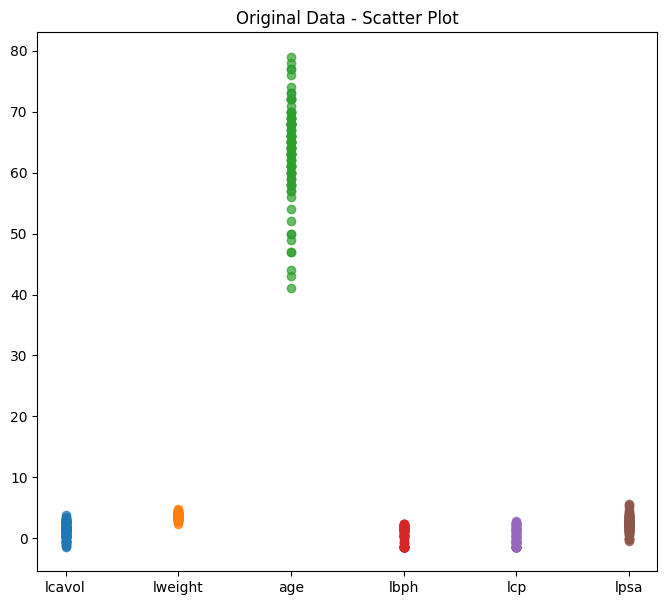

In [5]:
"""
Are there issues with outliers in the data,
"""
figure(figsize=(8, 7))
for i in range(6):  # Loop over the number of attributes (columns)
    plt.scatter([i+1] * len(X[:, i]), X[:, i], alpha=0.7)
xticks(range(1, 7), attributeNames)
title("Original Data - Scatter Plot")
show()

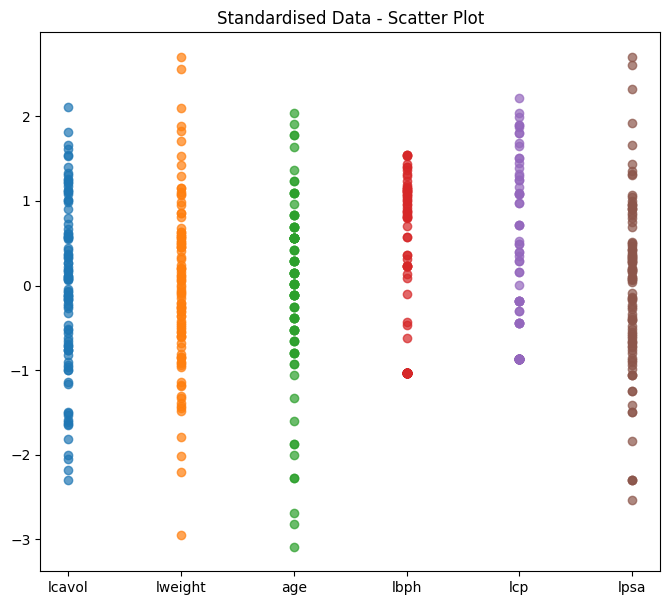

In [6]:
# Standardise
Y = X - np.ones((N, 1)) * X.mean(axis=0)
Y = Y * (1 / np.std(Y, 0))

figure(figsize=(8, 7))
for i in range(6):  # Loop over the number of attributes (columns)
    plt.scatter([i+1] * len(Y[:, i]), Y[:, i], alpha=0.7)
xticks(range(1, 7), attributeNames)
title("Standardised Data - Scatter Plot")
show()

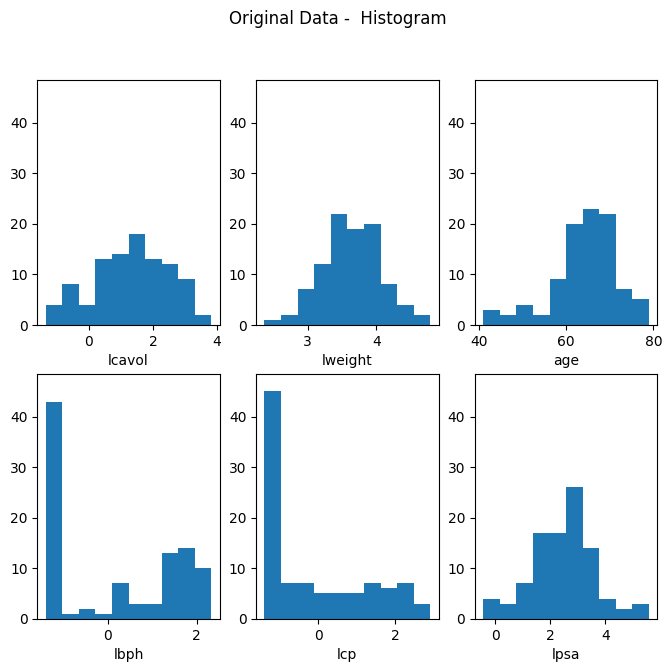

In [7]:
"""
do the attributes appear to be normal distributed,
"""
figure(figsize=(8, 7))
u = np.floor(np.sqrt(M))
v = np.ceil(float(M) / u)
for i in range(M):
    subplot(int(u), int(v), i + 1)
    hist(X[:, i])
    xlabel(attributeNames[i])
    ylim(0, N / 2)

suptitle("Original Data -  Histogram")
show()

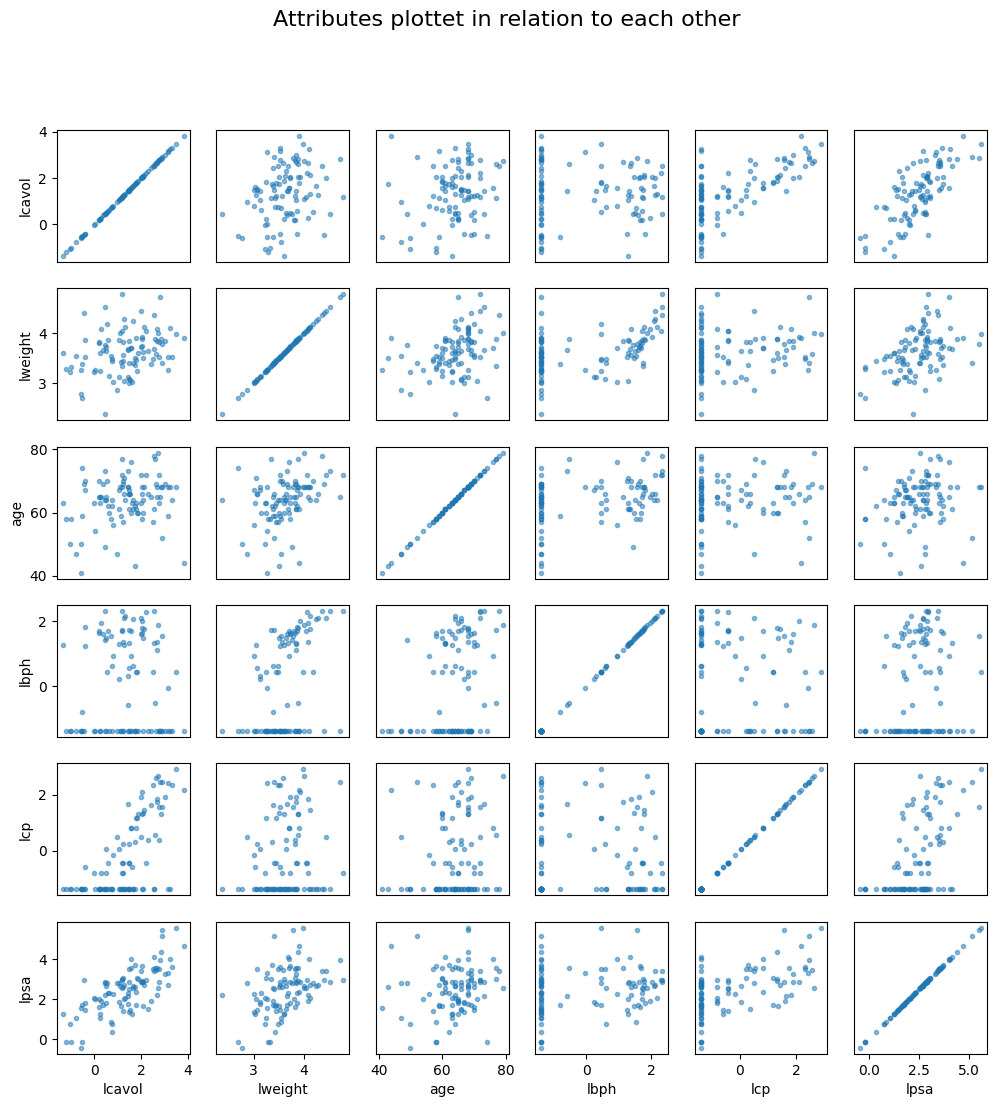

In [8]:
"""
- are variables correlated,
"""
import matplotlib.pyplot as plt

# Definer attributter (du kan inkludere flere attributter, hvis du vil plotte alle)
selected_attributes = [0, 1, 2, 3, 4, 5]  # Udskift med alle kolonner du ønsker at plotte
NumAtr = len(selected_attributes)

# Opret figuren med en større størrelse for bedre visualisering
plt.figure(figsize=(12, 12))

plt.suptitle("Attributes plottet in relation to each other", fontsize=16)

# Laver subplots for hver kombination af attributter
for m1 in range(NumAtr):
    for m2 in range(NumAtr):
        plt.subplot(NumAtr, NumAtr, m1 * NumAtr + m2 + 1)
        
        # Plotter alle data uden klasseseparation
        plt.plot(X[:, selected_attributes[m2]], X[:, selected_attributes[m1]], ".", alpha=0.5)
        
        # Etiketter på x- og y-aksen, når det er den nederste række og første kolonne
        if m1 == NumAtr - 1:
            plt.xlabel(attributeNames[selected_attributes[m2]])
        else:
            plt.xticks([])
        if m2 == 0:
            plt.ylabel(attributeNames[selected_attributes[m1]])
        else:
            plt.yticks([])

# Viser plottet
plt.show()



In [9]:
"""
PCA
"""
from scipy.linalg import svd

# PCA by computing SVD of Y
U, S, V = svd(Y, full_matrices=False)



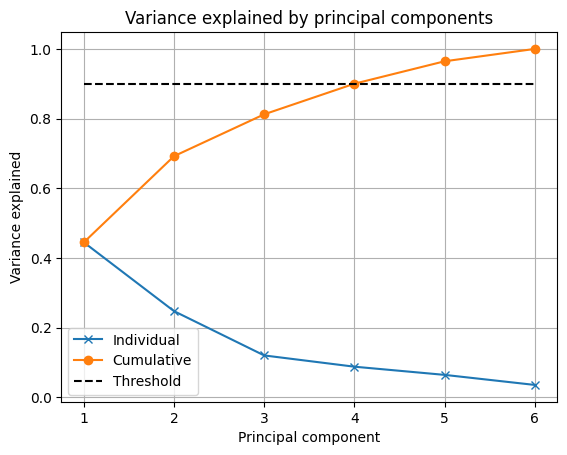

Variance explained by PCA: [0.44480448 0.24731228 0.12015754 0.08785313 0.06435975 0.03551282]


In [10]:

"""
The amount of variation explained as a function of the number of PCA
components included,
"""
# Compute variance explained by principal components
rho = (S * S) / (S * S).sum()

threshold = 0.9

# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()

print(f"Variance explained by PCA: {rho}")

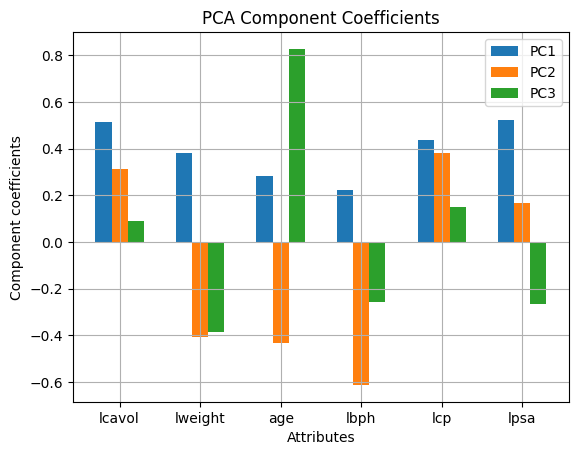

In [11]:
"""
the principal directions of the considered PCA components (either find a
way to plot them or interpret them in terms of the features),
"""
import numpy as np
import xlrd
Y = X - np.ones((N, 1)) * X.mean(0)
Y = Y * (1 / np.std(Y, 0))
U, S, Vh = svd(Y, full_matrices=False)
V = Vh.T
N, M = X.shape

# We saw in 2.1.3 that the first 3 components explaiend more than 90
# percent of the variance. Let's look at their coefficients:
pcs = [0, 1, 2]
legendStrs = ["PC" + str(e + 1) for e in pcs]
c = ["r", "g", "b"]
bw = 0.2
r = np.arange(1, M + 1)
for i in pcs:
    plt.bar(r + i * bw, V[:, i], width=bw)
plt.xticks(r + bw, attributeNames)
plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.legend(legendStrs)
plt.grid()
plt.title("PCA Component Coefficients")
plt.show()

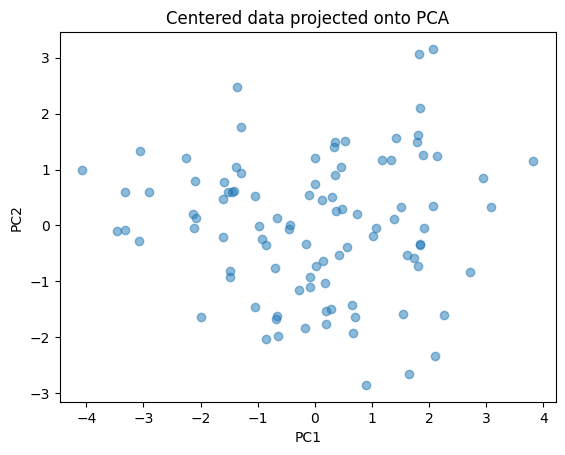

In [12]:
"""
the data projected onto the considered principal components.
"""
from matplotlib.pyplot import figure, legend, plot, show, title, xlabel, ylabel

# Project the centered data onto principal component space
Z = Y @ V

# Indices of the principal components to be plotted
i = 0
j = 1

# Plot PCA of the data
f = figure()
title("Centered data projected onto PCA")
plot(Z[:, i], Z[:, j], "o", alpha=0.5)  # Plot all data points without class separation
xlabel("PC{0}".format(i + 1))
ylabel("PC{0}".format(j + 1))

# Output result to screen
show()